# PyMarek - Day 1 (DSR 17)

## NumPy == Numerical Python

www.numpy.org

ndarray = N-dimensional array
* N=0 (scalar)
* N=1 (vector)
* N=2 (matrix)
* N≥3 (tensor)

In [1]:
import numpy as np

In [3]:
# variance
def var1(x):
    # mean =
    mean = 0
    for i in range(len(x)):
        mean += x[i]
    mean /= len(x)
    
    # square of differences to mean
    ssq = 0
    for i in range(len(x)):
        ssq += (x[i] - mean) ** 2
    
    return ssq/(len(x) - 1)

This is iterative method is not efficient. 

In [6]:
np.random.seed(123) # gives us reproducible numbers (the 'random' numbers will always be the same)
x = np.random.rand(10_000_000)
var1(x), np.var(x, ddof=1), x.var(ddof=1), np.sum((x - x.mean()) ** 2) / (len(x) - 1)

(0.08329811214644092,
 0.08329811214645218,
 0.08329811214645218,
 0.08329811214645218)

In [8]:
%timeit var1(x)
%timeit np.var(x)
%timeit x.var(ddof=1)
%timeit np.sum((x - x.mean()) ** 2) / (len(x) - 1)

7.41 s ± 86.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
39.7 ms ± 728 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
39.4 ms ± 689 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
39.5 ms ± 419 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Numpy is written in C, so it's way faster than loops in Python

# creating arrays

In [12]:
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

In [13]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [15]:
np.arange(10.0)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [16]:
np.arange(10, dtype=np.float)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [17]:
np.arange(10, dtype=np.complex)

array([0.+0.j, 1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j, 5.+0.j, 6.+0.j, 7.+0.j,
       8.+0.j, 9.+0.j])

In [18]:
x = np.arange(10, dtype=np.float)

In [19]:
x.dtype.name

'float64'

In [20]:
np.arange(12).dtype.name

'int64'

In [21]:
y = ['a', 'b', 'c']
y[0] + y[1]

'ab'

In [22]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
np.zeros(10, dtype=bool)

array([False, False, False, False, False, False, False, False, False,
       False])

In [25]:
np.ones(10, dtype=bool)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [28]:
bool(None)

False

In [29]:
bool(0)

False

In [30]:
bool(-1)

True

In [31]:
np.empty(15, dtype=np.float)

array([ 1.49166815e-154,  1.73059812e-077,  3.95252517e-323,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000, -1.73059812e-077])

In [32]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [33]:
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [34]:
type(x)

numpy.ndarray

In [36]:
x.dtype

dtype('float64')

1 float = 8 bytes  
2 * 1_000_000_000 floats = 16 GB  
n x n matrix: n x n  

In [37]:
n = 100_000
8 * n * n / 1e9

80.0

In [38]:
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [39]:
len(x)

10

In [40]:
x.ndim

1

In [41]:
x.shape

(10,)

In [42]:
A = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8], 
    [9, 10, 11, 12]
])

In [43]:
A.ndim

2

In [44]:
A.shape

(3, 4)

In [45]:
A.ravel() # C-order (row-major)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [47]:
A.shape = (2, 6)
A

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [48]:
A.shape = (12,)
A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [49]:
A.shape = (1, 12)
A

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [50]:
A.reshape(4, 3)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [51]:
A.reshape(-1,1) # -1 for as many as required

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [52]:
A.reshape(3, -1)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [53]:
A.reshape(2, 2, -1)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [54]:
np.random.rand(5)

array([0.13269669, 0.59718488, 0.01231248, 0.81183034, 0.17356025])

In [55]:
np.random.rand(5, 2)

array([[0.36971298, 0.34476302],
       [0.04789446, 0.21793509],
       [0.2035978 , 0.89054429],
       [0.07562606, 0.81611142],
       [0.99369836, 0.5930957 ]])

In [56]:
np.random.randn(5)

array([-0.30814769,  1.58816095, -0.97340997,  0.23378447, -0.3542106 ])

In [57]:
np.random.binomial(n=10, p=0.5, size=5)

array([3, 4, 3, 7, 5])

In [58]:
np.random.randint(0, 10, 15)

array([3, 4, 2, 0, 8, 0, 9, 3, 4, 6, 8, 3, 3, 0, 1])

In [59]:
np.random.choice(['1', '2', '3'], 9, p=[0.5, 0.4, 0.1]) # dtype U1 = Unicode of length 1

array(['2', '2', '2', '1', '2', '1', '1', '2', '2'], dtype='<U1')

In [61]:
np.full(25, 5)
np.repeat(5, 25)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5])

In [70]:
np.append(np.ones(10), np.full(10, 2))
np.repeat([1,2], 10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
np.repeat([1,2], [10, 20])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
np.tile([1,2], 10)

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [74]:
np.repeat([1, 2], 10, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
np.repeat([[1, 2]], 10, axis=1)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [78]:
np.repeat([[1, 2]], 10, axis=0)

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [81]:
np.random.seed(123)
A = np.round(np.random.rand(3,2), 2)
A

array([[0.7 , 0.29],
       [0.23, 0.55],
       [0.72, 0.42]])

In [89]:
np.insert(A, 2, np.ones(3), axis=1)
np.insert(A, 2, 1, axis=1)

array([[0.7 , 0.29, 1.  ],
       [0.23, 0.55, 1.  ],
       [0.72, 0.42, 1.  ]])

In [90]:
np.insert(A, 1, 2, axis=1) # A, where, what, axis

array([[0.7 , 2.  , 0.29],
       [0.23, 2.  , 0.55],
       [0.72, 2.  , 0.42]])

In [91]:
np.r_[1, 2, 3]   #__getitem__()

array([1, 2, 3])

In [92]:
np.array([1, 2, 3])

array([1, 2, 3])

In [93]:
np.r_[1:6]

array([1, 2, 3, 4, 5])

In [94]:
np.r_[0, 1, 2:10:2, 10:3:-3]

array([ 0,  1,  2,  4,  6,  8, 10,  7,  4])

In [95]:
np.r_[0:1:5j]   # j switches from arange to linspace

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [96]:
np.r_[ 0.1:0.5:0.1 ]

array([0.1, 0.2, 0.3, 0.4])

In [97]:
np.c_[ [1,2,3], [4,5,6] ]

array([[1, 4],
       [2, 5],
       [3, 6]])

# Arithmatic operators

'+ - * / // % **

In [98]:
# all these ops are vectorize

In [99]:
# 1. vector[n] * vector[n]
np.r_[1, 2, 3] * np.r_[1, 10, 100]

array([  1,  20, 300])

In [101]:
weights = [70, 80, 55, 103]
heights = [181, 154, 163, 201]


array([181, 154, 163, 201])

In [102]:
np.r_[weights]

array([ 70,  80,  55, 103])

In [103]:
np.r_[heights]

array([181, 154, 163, 201])

In [105]:
import pandas as pd
ppl = pd.DataFrame(dict(w=np.r_[weights], h=np.r_[heights]))
ppl

,w,h
0,70,181
1,80,154
2,55,163
3,103,201


In [106]:
ppl.w / (ppl.h/100) ** 2

0    21.366869
1    33.732501
2    20.700817
3    25.494418
dtype: float64

In [107]:
# 2. vector[n] * scalar
np.r_[1, 10, 100] * (-1)

array([  -1,  -10, -100])

In [109]:
# 3. matrix[n, m] * matrix[n, m]
A = np.array([[1, 10, 100], [-1, -10, -100]])
A

array([[   1,   10,  100],
       [  -1,  -10, -100]])

In [110]:
A * A

array([[    1,   100, 10000],
       [    1,   100, 10000]])

In [111]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [113]:
A @ A.T # A.dot(A.T)

array([[ 10101, -10101],
       [-10101,  10101]])

In [114]:
# 4. matrix[n, m] * vector[m]
A * np.r_[1, 2, 3]

array([[   1,   20,  300],
       [  -1,  -20, -300]])

In [115]:
# 4. matrix[n, m] * vector[1, m]
A * np.r_[1, 2, 3].reshape(1, -1)

array([[   1,   20,  300],
       [  -1,  -20, -300]])

In [116]:
# 4b. matrix[n, m] * matrix[n, 1]
A * np.r_[5, 9].reshape(-1, 1)

array([[   5,   50,  500],
       [  -9,  -90, -900]])

In [117]:
# 5. matrix [1, m] * matrix [n, 1]
np.r_[1, 10, 100].reshape(1, 3) * np.r_[1, -1].reshape(2, 1)

array([[   1,   10,  100],
       [  -1,  -10, -100]])

In [121]:
np.r_[1, 10, 100].reshape(1, 3) + np.r_[2, 3].reshape(2, 1)

array([[  3,  12, 102],
       [  4,  13, 103]])

In [122]:
# shape broadcasting

In [123]:
np.ones((3, 4)) * np.ones((5, 4))

ValueError: operands could not be broadcast together with shapes (3,4) (5,4) 

In [124]:
np.ones((3, 4, 10, 10, 10)) * np.ones((10))

array([[[[[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         ...,

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [1., 1., 1., ..., 1., 1., 1.],
          [1., 1.

# Aggregation functions

In [126]:
#    funs: np.sum(A), prod, mean, var, std, max, min, all, any, median
# methods: A.sum(),   prod, mean, var, std, max, min, all, any, ----


In [125]:
A

array([[   1,   10,  100],
       [  -1,  -10, -100]])

In [127]:
A.sum()

0

In [128]:
A.sum(axis=0)

array([0, 0, 0])

In [129]:
A.sum(axis=1)

array([ 111, -111])

In [131]:
# min, max, median ->
np.percentile(np.r_[3, 2, 1, 5, 4], [0, 50, 100])

array([1., 3., 5.])

In [132]:
# 25-percentile (quantile of order 0.25 = q1 == 1st quartile)

[]

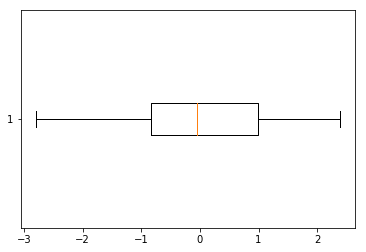

In [136]:
import matplotlib.pyplot as plt
np.random.seed(123)
x = np.random.randn(100)
plt.boxplot(x, vert=False)
plt.plot()

In [138]:
tips = pd.read_csv('http://www.gagolewski.com/resources/data/tips.csv', comment='#')

In [139]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


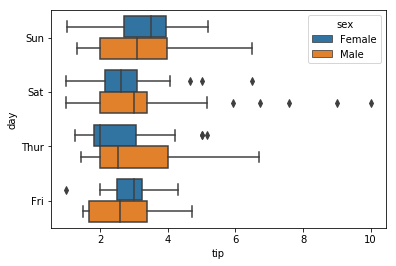

In [141]:
import seaborn as sns
sns.boxplot(data=tips, x='tip', y='day', hue='sex')
plt.show()

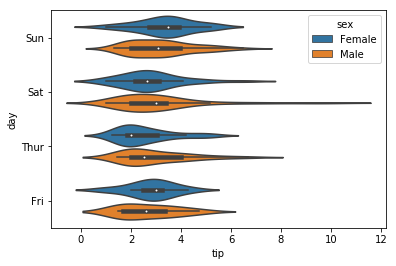

In [142]:
import seaborn as sns
sns.violinplot(data=tips, x='tip', y='day', hue='sex')
plt.show()

In [145]:
iris = pd.read_csv('http://www.gagolewski.com/resources/data/iris.csv', comment='#')
X = np.array(iris.sample(n=10, random_state=123).iloc[:,0:4])

In [146]:
X

array([[6.3, 2.5, 4.9, 1.5],
       [6.8, 3. , 5.5, 2.1],
       [6.4, 2.8, 5.6, 2.2],
       [5.6, 3. , 4.1, 1.3],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 3. , 4.8, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [4.4, 3.2, 1.3, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [5.5, 2.6, 4.4, 1.2]])

In [ ]:
# standardize the columns (variables) in X === compute the z-scores of each column
# subtract the mean and divide by std

In [161]:
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
X_std

array([[ 0.78994288, -1.11247092,  0.68267306,  0.41842255],
       [ 1.40708575,  0.31377385,  1.04839077,  1.22827264],
       [ 0.91337145, -0.25672406,  1.10934372,  1.36324765],
       [-0.07405714,  0.31377385,  0.19504944,  0.14847252],
       [-0.93805717,  2.02526756, -1.45068025, -1.47122766],
       [ 0.41965715,  0.31377385,  0.62172011,  0.82334759],
       [ 0.78994288, -1.68296882,  0.3779083 ,  0.14847252],
       [-1.55520004,  0.88427175, -1.5116332 , -1.33625265],
       [-1.55520004,  0.0285249 , -1.45068025, -1.33625265],
       [-0.19748572, -0.82722196,  0.3779083 ,  0.0134975 ]])

In [162]:
X_std.mean(axis=0)

array([-6.66133815e-17,  8.54871729e-16,  1.49880108e-16,  7.09501902e-17])

In [163]:
X_std.std(axis=0)

array([1., 1., 1., 1.])

In [184]:
# pearson linear correlation coefficient for (x,y): 

$$
r(\mathbf(x), \mathbf{y}) = \frac{1}{n-1} \sum_{}
$$

SyntaxError: invalid syntax (<ipython-input-184-f099fa5b83db>, line 3)

In [164]:
# r = [-1, 1]

In [165]:
X[:,0]

array([6.3, 6.8, 6.4, 5.6, 4.9, 6. , 6.3, 4.4, 4.4, 5.5])

In [175]:

def pearson(x,y):
    assert len(x) == len(y), 'the vectors must have the same size'
    return sum((x - x.mean(axis=0)) / x.std(axis=0) * (y - y.mean(axis=0)) / y.std(axis=0)) / (len(x) - 1)
    

In [176]:
x = X[:,0]
y = X[:,1]

In [177]:
pearson(x,y)

-0.5609787549894139

In [ ]:
# hard: correlation between each pair of variables

In [182]:
X_std = (X - np.mean(X, axis=0))/np.std(X, axis=0)

In [183]:
(X_std.T @ X_std)/(X.shape[0] - 1)

array([[ 1.11111111, -0.56097875,  1.05176236,  1.03216554],
       [-0.56097875,  1.11111111, -0.63596925, -0.50950294],
       [ 1.05176236, -0.63596925,  1.11111111,  1.08671187],
       [ 1.03216554, -0.50950294,  1.08671187,  1.11111111]])